In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# notebook을 실행한 브라우저에서 바로 그림을 볼 수있게 해주는 명령어
# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

# csv 파일 불러오기
# 파일 경로는 colab이용시 드라이브 경로, vsc이용시 로컬경로
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/google-app-store/google-app-pre.csv')

# 제대로 불러와졌는지 확인하고싶으면
print(data.shape) # 행, 열의 개수 확인 가능
# 모든 데이터 확인 가능

# # 결측치 제거 후 확인하고싶으면
# data.isnull().sum()

(256596, 15)


In [4]:
# data = data.drop(data.columns[0], axis =1)

data


,App Name,App Id,Category,Rating,Maximum Installs,Free,Price,Currency,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,62433,True,0.0,USD,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
1,Caliway Conductor,com.caliwayconductor.driver,Travel & Local,3.7,42856,True,0.0,USD,"Sep 5, 2018","May 30, 2020",Everyone,False,False,False
2,REDMOND Robot,com.grit.redmond,Lifestyle,3.7,31235,True,0.0,USD,"Jul 1, 2020","May 26, 2021",Everyone,False,False,False
3,Coloring Book Barbaie,com.bisgumah.barbie,Entertainment,3.8,646456,True,0.0,USD,"Apr 21, 2019","Nov 13, 2020",Everyone,True,False,False
4,Random Number Generator,com.gary.randomnumber,Tools,4.2,21124,True,0.0,USD,"May 28, 2017","May 30, 2020",Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256591,Aditivos Alimentarios,com.dac.codigose,Health & Fitness,4.6,47677,True,0.0,USD,"Jan 21, 2014","May 10, 2021",Everyone,True,False,False
256592,FAIRTIQ,com.fairtiq.android,Maps & Navigation,4.2,317297,True,0.0,USD,"Apr 27, 2016","May 31, 2021",Everyone,False,False,False
256593,Moneygment,ph.moneygment,Finance,2.0,187822,True,0.0,USD,"Oct 21, 2017","Jun 07, 2021",Everyone,False,False,False
256594,La Sicilia Edicola Digitale,andr.lasicilia.agrigento,Entertainment,2.7,20415,True,0.0,USD,"Apr 16, 2015","Apr 06, 2020",Everyone,True,False,False


In [5]:
def floatToInt(x):
  return int(x)
data['IntRating'] = data['Rating'].apply(floatToInt)





# [1] 수요는 높지만, 만족도가 평균치보다 낮아 도전해볼만한 시장분석하기 
# => 변경후 : 만족도가 평균치보다 낮아 도전해 볼만한 시장 분석하기 

> 원래 작성했던 수요 높고 낮음 파악하는 데이터는 삭제 했어요! 하얀님 꺼랑 겹친다고 해서요.. 그래서 코치님이 말씀해주셨던 대로, 각각 파악한걸 보여주고,  에디터스 페이지 제일 아래에 그러므로 우리의 결론은 이거다 하고 보여주는 건 어떨까요?  데분팀 각각이 파악한 거에서 겹치는 부분을 뽑고, 그것이 우리가 추천하는 시장이다! 이런 식으로요!






# 만족도가 평균치보다 낮아 도전해 볼만한 시장 분석하기 


1. 만족도가 평균치보다 낮아 도전해 볼만한 시장인지 판단하기

- 각 카테고리 별 평점을 봤을 때, 3점대이하 어플의 비율이 높은 카테고리: 예를 들어 게임 카테고리에서 평점별 앱 개수를 봤을 때, 3점대 이하가 많다면 만족도가 평균치보다 낮아 도전해볼 만한 시장이라고 판단 













In [7]:
category =data['Category'].unique()
b = [["0"],[0]]
new = pd.DataFrame({"Category":["0"],"IntRating": [0] })

for cate in category:
  intrating = data[data['Category']== cate].groupby('IntRating').size()
  a = intrating.to_numpy()
  new.loc[cate] = [cate,a]

new = new.drop([0])


# data.goupby(['Category','Rating']).size()

new = new.reset_index(drop = True)
new.to_json('./category_rating.json',orient = 'records')
new

,Category,IntRating
0,Personalization,"[26, 249, 2872, 13086, 42]"
1,Travel & Local,"[80, 586, 2115, 2864, 18]"
2,Lifestyle,"[142, 920, 3093, 6152, 26]"
3,Entertainment,"[162, 1703, 8143, 11028, 40]"
4,Tools,"[276, 2024, 7394, 9962, 30]"
5,Health & Fitness,"[150, 788, 2001, 3311, 14]"
6,Books & Reference,"[41, 445, 2364, 9246, 42]"
7,News & Magazines,"[39, 401, 1635, 2904, 3]"
8,Finance,"[187, 1122, 3607, 5329, 9]"
9,Maps & Navigation,"[68, 436, 1331, 1478, 3]"


In [10]:
# 3점대 이하 카테고별 앱 개수
rating_apps =data[data['IntRating'] <= 3].groupby('Category').size()

#  카테고리 별 전체 앱 개수
total_apps = data.groupby('Category').size()

# 카테고리 내에서 3점대 어플의 비율 과 그 순위
ratio_rating = pd.DataFrame((rating_apps/total_apps)*100)
ratio_rating.columns = ['Ratio']
ratio_rating['Ratio Rank'] = ratio_rating['Ratio'].rank(ascending =False)
ratio_rating['Ratio Rank'] = ratio_rating['Ratio Rank'].astype(int)
new = ratio_rating.copy()
new.sort_values('Ratio Rank')
new['Category'] = new.index
new2 = new.sort_values('Ratio Rank').reset_index(drop =True)
new2_top10 = new2.loc[:9] 

# 결과: 카테고리별 앱 중에서 3점대 이하인 앱의 비율 -> 높을수록 만족도가 낮은 시장!
new2_top10

,Ratio,Ratio Rank,Category
0,58.324716,1,House & Home
1,57.669237,2,Dating
2,55.337756,3,Maps & Navigation
3,55.020080,4,Business
4,54.772475,5,Auto & Vehicles
5,54.431462,6,Video Players & Editors
6,49.650350,7,Beauty
7,49.243117,8,Tools
8,49.108247,9,Travel & Local
9,48.020434,10,Shopping


In [11]:
new2_top10.to_json('./category_rating_rank.json',orient = 'records')

## 3점대 이하 중 도전해볼만한 카테고리

즉, 결론: 

#### **시각화1(그래프)**: 카테고리별 평점 분포 확인하기

{<br/>
  "Category": "Tools", <br/>
  "IntRating": [276,2024,7394,9962,30]<br/>
}<br/>

시각화 방식: <br/>
Category (예시와 대응해보면, 직무에 들어감) <br/>
data(세로축): IntRating (예시와 대응시, 평균 연소득)<br/>
labels(가로축): [1,2,3,4,5] (예시와 대응시, 평균 재직기간)<br/>

####  **시각화2(표)**: 카테고리별 앱 중에서 3점대 이하인 앱의 비율을 순위 보여주기 
열: 순위, 카테고리, 3점대 이하 비율

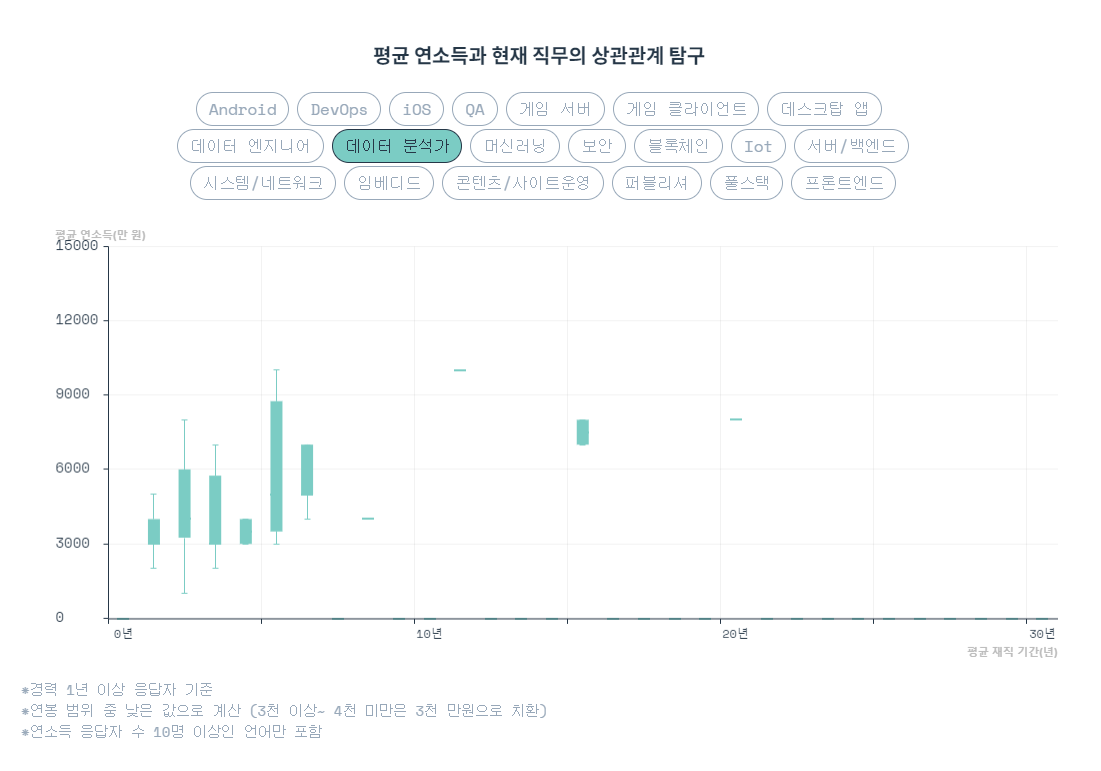